In [1]:
# Copyright 2020 IITK EE604A Image Processing. All Rights Reserved.
# 
# Licensed under the MIT License. Use and/or modification of this code outside of EE604 must reference:
#
# © IITK EE604A Image Processing 
# https://github.com/ee604/ee604_assignments
#
# Author: Shashi Kant Gupta, Chiranjeev Prachand and Prof K. S. Venkatesh, Department of Electrical Engineering, IIT Kanpur

# Task 1: Frequency Domain Analysis - Resizing

Remember, we already did this using operation in the spatial domain (interpolation methods)? Now let's do the same thing using frequency domain analysis.

In [2]:
%%bash
pip install git+https://github.com/ee604/ee604_plugins

  Cloning https://github.com/ee604/ee604_plugins to /tmp/pip-req-build-doegmqt4
  Created wheel for ee604-plugins: filename=ee604_plugins-0.3.2-cp36-none-any.whl size=2311 sha256=bcba0e7eb3f2f6296c3a506ae3161dae5d308bb56562093a17a876ea76db9773
  Stored in directory: /tmp/pip-ephem-wheel-cache-1mdivn05/wheels/34/a8/1d/ae3b7d209ecde89b4800a47ec55a61e7503bb9548bbb975806
Successfully built ee604-plugins


  Running command git clone -q https://github.com/ee604/ee604_plugins /tmp/pip-req-build-doegmqt4


In [3]:
# Importing required libraries

import cv2
import numpy as np
import matplotlib.pyplot as plt

from ee604_plugins import download_dataset, cv2_imshow

download_dataset(assignment_no=3, task_no=1) # download data for this assignment

Download Complete!


In [6]:
def resize_ft(img, k=1):
    '''
    Write a program to resize the given image by a factor 'k' using frequency domain analysis.
    
    Inputs:
    + img - Original image
    + k - resampling factor, therefore if input image size is 300x300 
        - and k=0.5 ==> output image size = 150x150
        - use int(k*input_image_size) to find the nearest integer
    
    Ouputs:
    + out_img - numpy array (of dtype np.uint8) containing the output image.
              - range should be between (0, 255) which may not be the case when u run the inverse DFT. 
              - Therefore, normalise the image by img = (img - min(img))/max(img) to rescale the values to (0, 255)
    
    Allowed external package:
    + You are allowed to use any cv2.dft or cv2.idft module or any other suitable module in numpy and cv2 
    + Just make sure you do not use any direct implementation.
    
    Hints:
    + For upscaling - pad the frquency domain signal with zeros around the center of the image. 
    + For downscaling - crop the frequency domain signal at the centre of required size.
    + PS - Make sure to use proper shift operation on output of cv2.dft so that your frequency domain signal 
         - assumes the centre of the image to be origin
    
    '''
    
    #############################
    # Start your code from here #
    #############################
    bias = pow(10,-100)
    img = img.copy().astype('float')
    out_size = int(k*img.shape[0])
    if k==1:
      out_img = img
    elif k<1:
      dft = cv2.dft(img,flags = cv2.DFT_COMPLEX_OUTPUT)
      dft = np.fft.fftshift(dft)

      diff = dft.shape[0] - out_size
      out_dft = dft[int(np.ceil(diff/2)):-diff//2,int(np.ceil(diff/2)):-diff//2]
      
      out_dft = np.fft.ifftshift(out_dft)
      out_idft = cv2.idft(out_dft)
      
      out_img = cv2.magnitude(out_idft[:,:,0],out_idft[:,:,1])
      
    else:
      dft = cv2.dft(img,flags = cv2.DFT_COMPLEX_OUTPUT)
      dft = np.fft.fftshift(dft)

      l = int(np.ceil(dft.shape[0]/2)); r = int(np.floor(dft.shape[0]/2))
      out_dft = np.zeros((out_size,out_size,2))
      out_dft[:l,:l] = dft[:l,:l]
      out_dft[:l,-r:] = dft[:l,-r:]
      out_dft[-r:,:l] = dft[-r:,:l]
      out_dft[-r:,-r:] = dft[-r:,-r:]
      
      out_dft = np.fft.ifftshift(out_dft)
      out_idft = cv2.idft(out_dft)

      out_img = cv2.magnitude(out_idft[:,:,0],out_idft[:,:,1])
    
    out_img = (((out_img-np.min(out_img))/(np.max(out_img)-np.min(out_img)+bias))*255).astype('uint8')
    
    #############################
    # End your code here ########
    #############################    
    
    return out_img

### Observations

Original


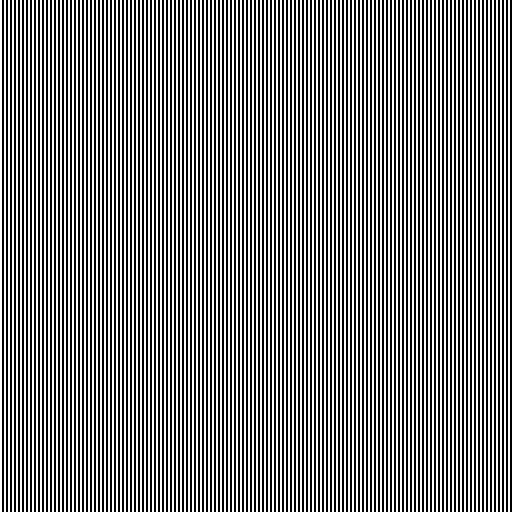

 k = 0.49


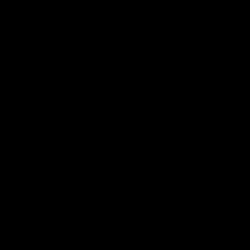

 k = 0.5


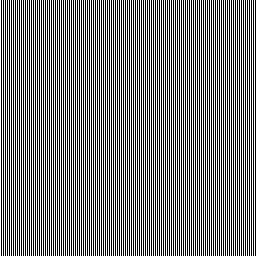

 k = 0.51


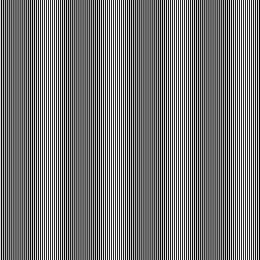

 k = 1.96


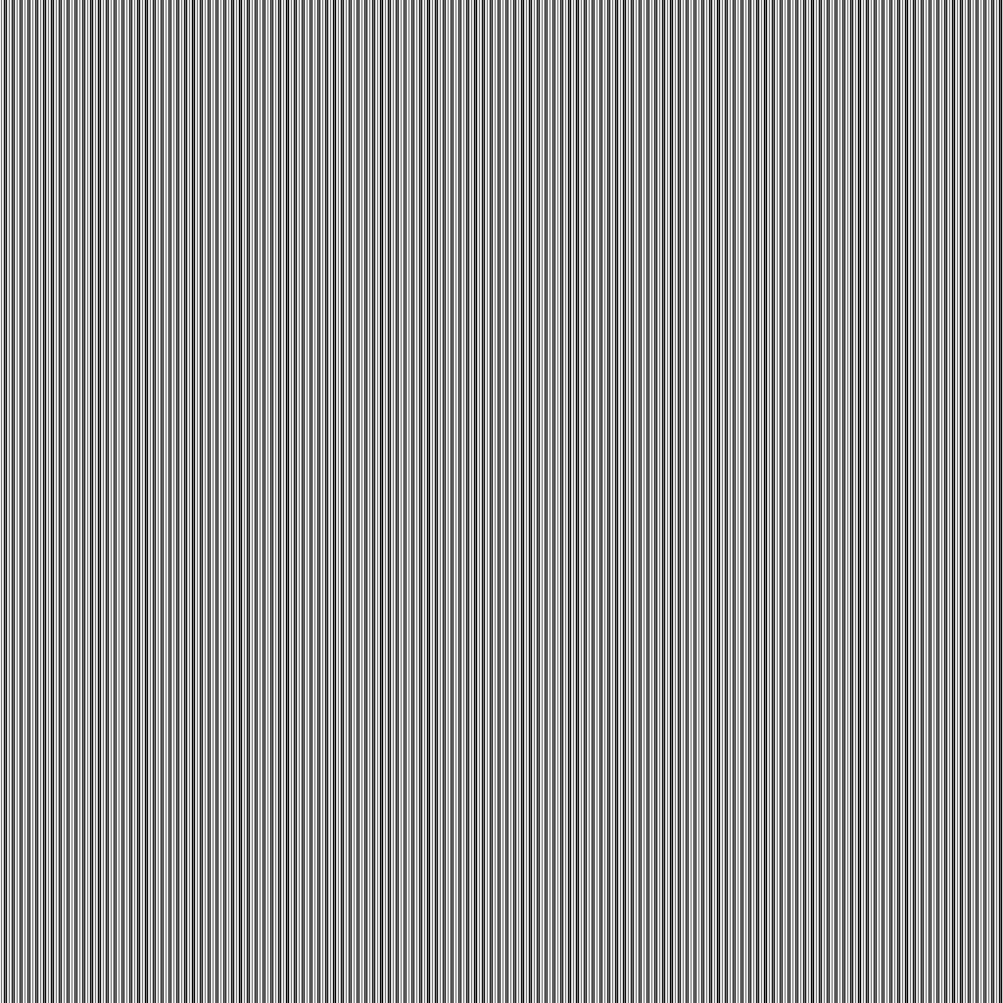

 k = 2


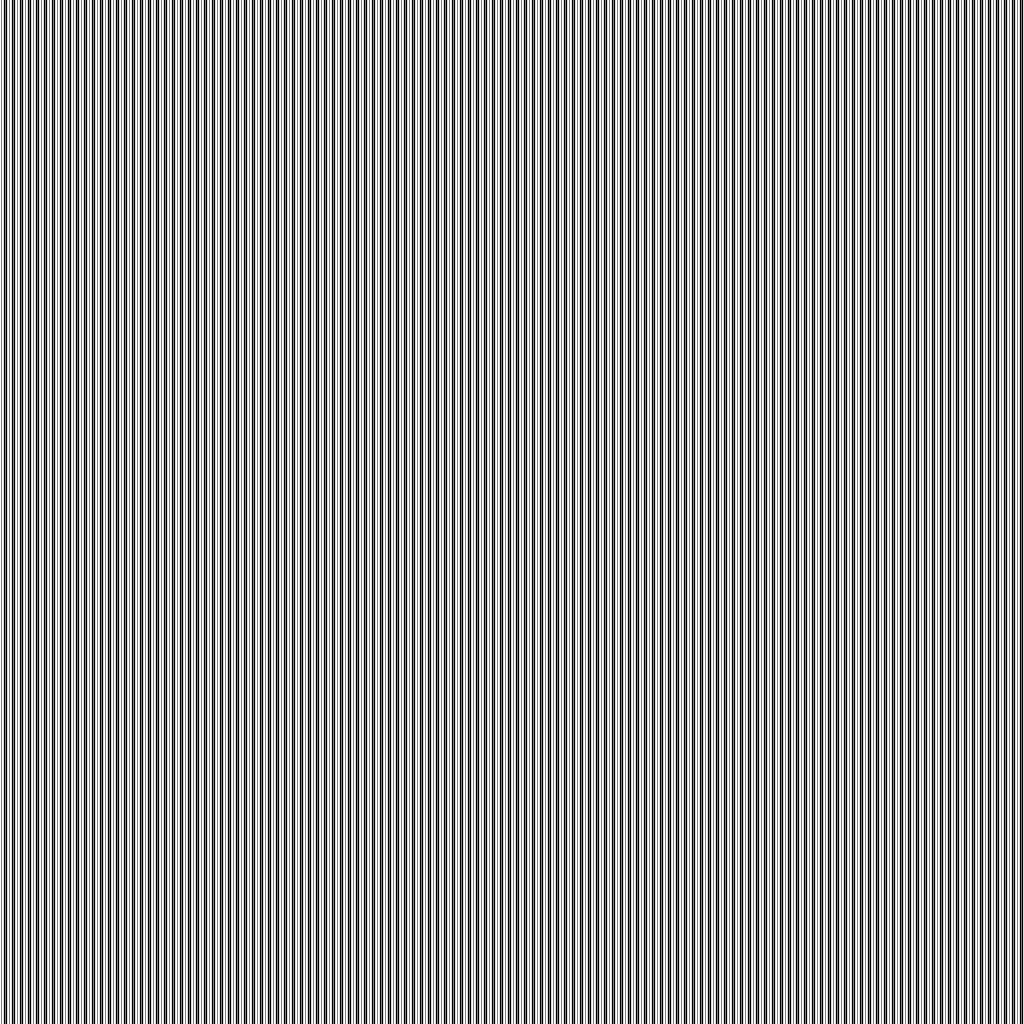

 k = 2.04


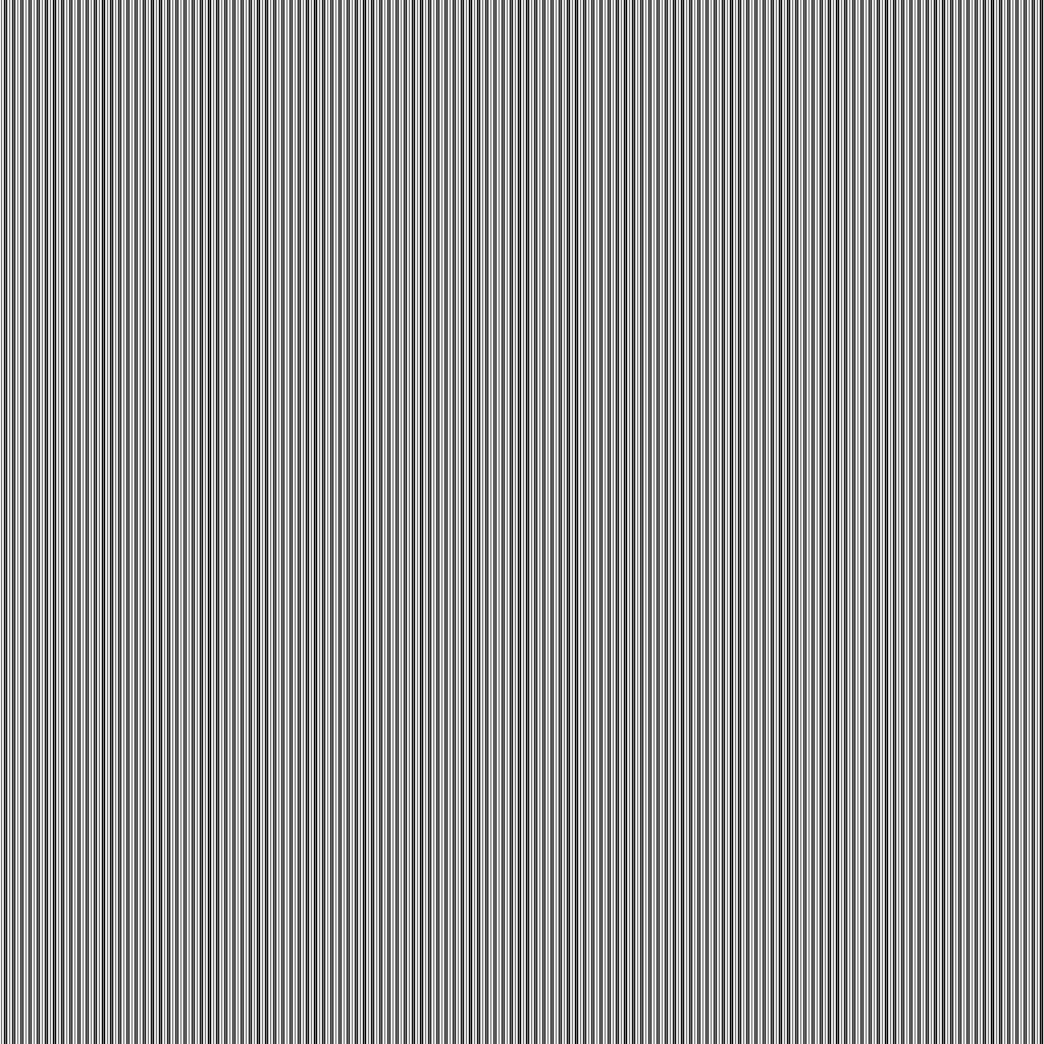

In [8]:
# Do not change codes inside this cell
# Add your observations in next cell
# Your observation should compare the output for different values of k

data = cv2.imread("data/parallel_lines.jpg", 0)

print("Original")
cv2_imshow(data)

for k in [0.49, 0.5, 0.51, 1.96, 2, 2.04]:
    tmp = resize_ft(data, k=k)
    print(" k = " + str(k))
    cv2_imshow(tmp)

In [12]:
your_observation = """
As expected, since we crop our spectrum for k<1, for 0.49, we lose critical information about the frequency of straight lines, resulting in the black output.

Whereas, for k>1, it is understandable that we shift our spectrum radially outward as now, 
one straigh line of a color will require more pixels to maintain the total no. of straight line as the original image.
"""

print(your_observation)


As expected, since we crop our spectrum for k<1, for 0.49, we lose critical information about the frequency of straight lines, resulting in the black output.

Whereas, for k>1, it is understandable that we shift our spectrum radially outward as now, 
one straigh line of a color will require more pixels to maintain the total no. of straight line as the original image.



In [13]:
# Submission >>>>>>>>>>>>>>>>>>>>>
# Do not change codes inside this cell.

gen_imgs = []
data = cv2.imread("data/parallel_lines.jpg", 0)

for k in [0.49, 0.5, 0.51, 1.96, 2, 2.04]:
    tmp = resize_ft(data, k=k)
    gen_imgs.append(tmp)

task1_submission = np.array(gen_imgs)